Problem specification:
Given:
n - number of conditionals
m - number of unique vectorised valuations (at most 2^num_prop_vars, at least 1)
Vi, for i from 1 to m - a vector in the format (vi1,...vin), with vij = 1 if it verifies the jth conditional, 0 if it doesn't, and u if it's undecided

Given n, m, and Vi's, first get the rational closure, then the Initial Disjunctive Rational Closure, then see if it can be extended even further


In [2]:
from core import *
from presets import *
from algorithms import *
from visual import *
from constants import *
from vvs_to_kb_generator import *
from random_vvs_generator import *

Find the Rational closure

Rank for valuation 1uuu is 0
Rank for valuation 01uu is 1
Rank for valuation u01u is 2
Rank for valuation 0u1u is 1
Rank for valuation 00u1 is 2
Rank for valuation 0001 is 2
Rank for valuation 000u is 2
Rank for valuation 0000 is 3


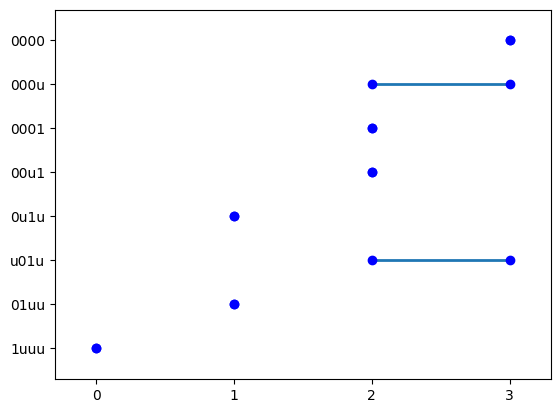

In [3]:
display(traditional_drc, preset_3)

Rank for valuation 111 is 0
Rank for valuation uuu is 0
Rank for valuation 01u is 1
Rank for valuation 0uu is 1
Rank for valuation 10u is 1
Rank for valuation u00 is 1


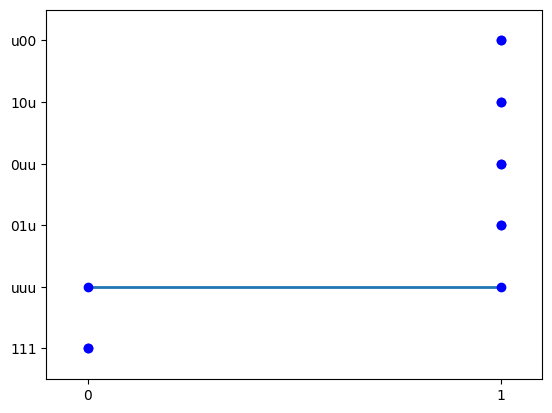

In [4]:
display(traditional_drc, preset_4)

Rank for valuation 11u is 0
Rank for valuation 0u1 is 1
Rank for valuation 001 is 1
Rank for valuation 000 is 2


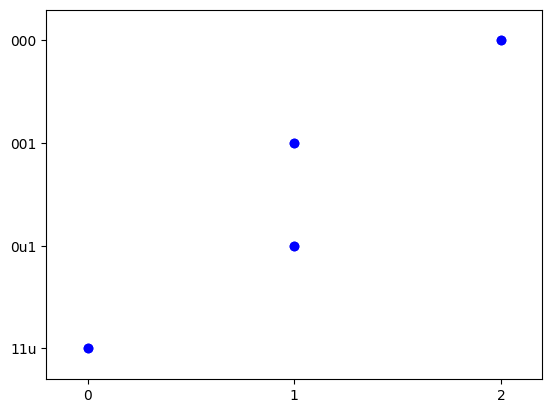

In [5]:
display(traditional_drc, preset_counterexample)

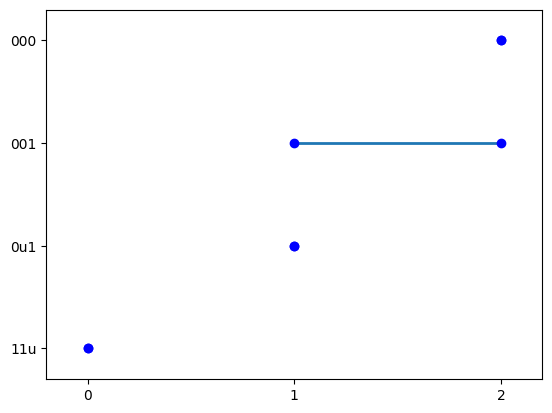

In [6]:
display_raw(["000", "001", "0u1", "11u"], [(2,2), (1,2), (1,1), (0,0)])

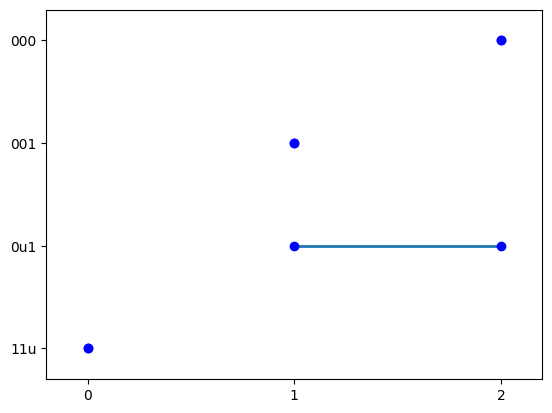

In [7]:
display_raw(["000", "001", "0u1", "11u"], [(2,2), (1,1), (1,2), (0,0)])

In [8]:
KB_preset_3 = construct_kb(preset_3, use_random=True)

In [9]:
print_kb(KB_preset_3)

a \lor b \lor c  \vsim  \neg a \land b \land \neg c
(a \lor \neg b \lor c) \land (a \lor b \lor \neg c)  \vsim  a \land \neg b \land c
(a \lor \neg b \lor c) \land (\neg a \lor b \lor \neg c) \land (a \lor \neg b \lor \neg c)  \vsim  (\neg a \land \neg b \land \neg c) \lor (\neg a \land \neg b \land c)
(a \lor \neg b \lor c) \land (\neg a \lor b \lor \neg c) \land (a \lor b \lor c) \land (a \lor b \lor \neg c) \land (\neg a \lor \neg b \lor c)  \vsim  (\neg a \land b \land c) \lor (a \land \neg b \land \neg c)


In [10]:
print_kb(construct_kb(construct_preset(["1uuu", "01uu", "0u1u", "u01u", "00u1", "0001", "000u", "0000"])))

a \lor b \lor \neg c  \vsim  a \land \neg b \land c
(\neg a \lor b \lor \neg c) \land (\neg a \lor \neg b \lor \neg c)  \vsim  \neg a \land b \land c
(\neg a \lor b \lor \neg c) \land (a \lor \neg b \lor \neg c) \land (\neg a \lor \neg b \lor c)  \vsim  (a \land b \land c) \lor (\neg a \land \neg b \land c)
(\neg a \lor b \lor \neg c) \land (a \lor \neg b \lor \neg c) \land (\neg a \lor \neg b \lor \neg c) \land (a \lor b \lor \neg c) \land (a \lor \neg b \lor c)  \vsim  (a \land b \land \neg c) \lor (\neg a \land \neg b \land \neg c)


Rank for valuation 0 is 1
Rank for valuation 1 is 0
Rank for valuation u is 0


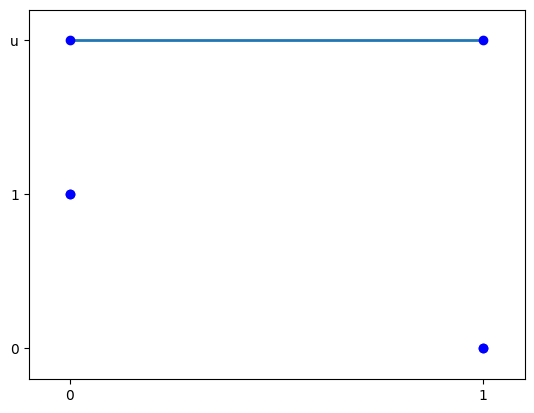

In [11]:
display(traditional_drc, construct_preset(["0", "1", "u"]))

Rank for valuation 00 is 1
Rank for valuation 0u is 1
Rank for valuation u0 is 1
Rank for valuation 01 is 1
Rank for valuation 10 is 1
Rank for valuation uu is 0
Rank for valuation u1 is 0
Rank for valuation 1u is 0
Rank for valuation 11 is 0


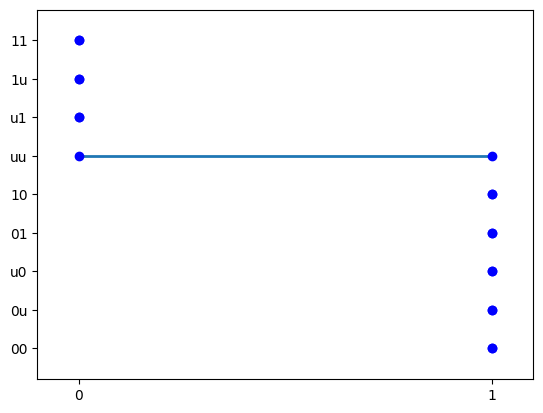

In [12]:
display(traditional_drc, construct_preset(["00", "0u", "u0", "01", "10", "uu", "u1", "1u", "11"]))

Rank for valuation 11u is 0
Rank for valuation 1u1 is 0
Rank for valuation u1u is 0
Rank for valuation uu1 is 0
Rank for valuation 01u is 1
Rank for valuation 0u1 is 1
Rank for valuation 100 is 1
Rank for valuation u00 is 1
Rank for valuation 000 is 1


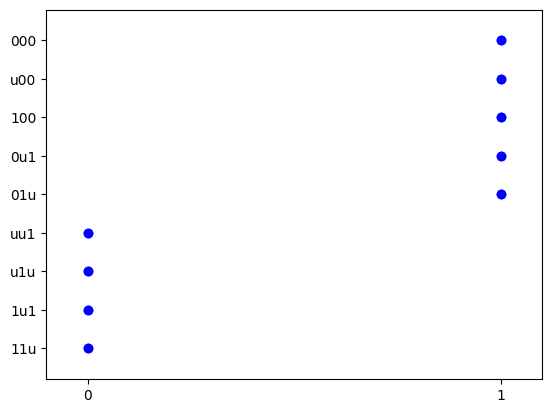

In [13]:
display(traditional_drc, construct_preset(["11u", "1u1", "u1u", "uu1", "01u", "0u1", "100", "u00", "000"]))

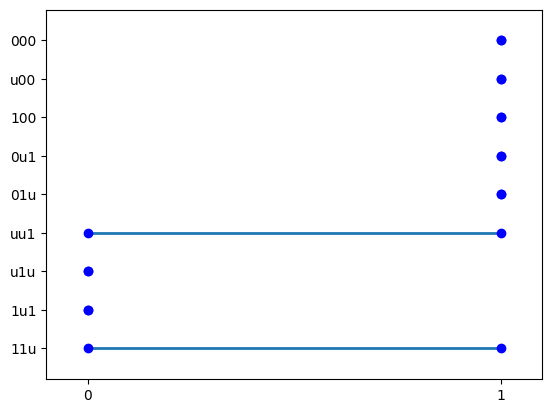

In [14]:
# Relevance 
display_raw(["11u", "1u1", "u1u", "uu1", "01u", "0u1", "100", "u00", "000"], [(0, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], reverse = True)

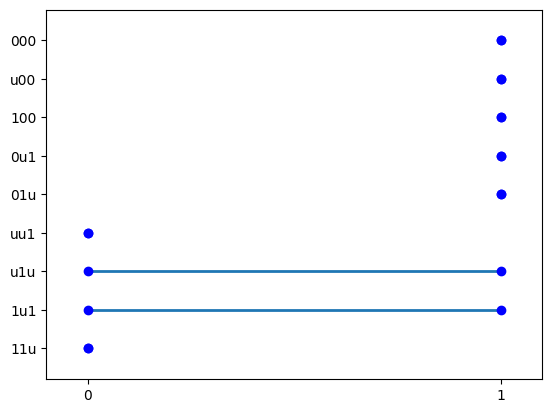

In [15]:
display_raw(["11u", "1u1", "u1u", "uu1", "01u", "0u1", "100", "u00", "000"], [(0, 0), (0, 1), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], reverse = True)

Rank for valuation 111u is 0
Rank for valuation u11u is 0
Rank for valuation 011u is 1
Rank for valuation 10u1 is 1
Rank for valuation u0u1 is 1
Rank for valuation 00u1 is 1
Rank for valuation 11u0 is 2
Rank for valuation u1u0 is 2
Rank for valuation 01u0 is 2
Rank for valuation 111u is 0
Rank for valuation u11u is 0
Rank for valuation 011u is 1
Rank for valuation 10u1 is 1
Rank for valuation u0u1 is 1
Rank for valuation 00u1 is 1
Rank for valuation 11u0 is 2
Rank for valuation u1u0 is 2
Rank for valuation 01u0 is 2


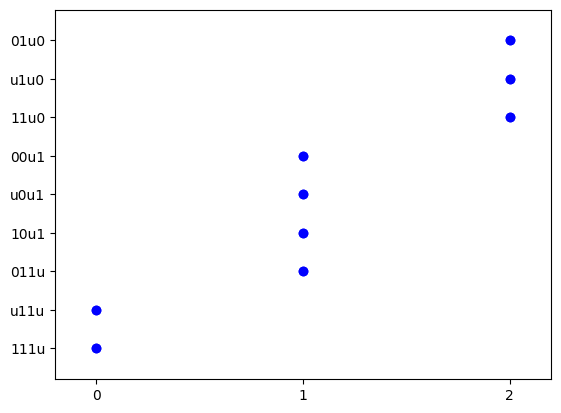

In [16]:
# n, m, valuations_raw, valuations, ranks, ranks_right = closure_algorithm(input_mt, return_input = True)

display(rational_closure, construct_preset(["111u", "u11u", "011u", "10u1", "u0u1", "00u1", "11u0", "u1u0", "01u0"]))

Rank for valuation 111u is 0
Rank for valuation u11u is 0
Rank for valuation 011u is 1
Rank for valuation 10u1 is 1
Rank for valuation u0u1 is 1
Rank for valuation 00u1 is 1
Rank for valuation 11u0 is 2
Rank for valuation u1u0 is 2
Rank for valuation 01u0 is 2


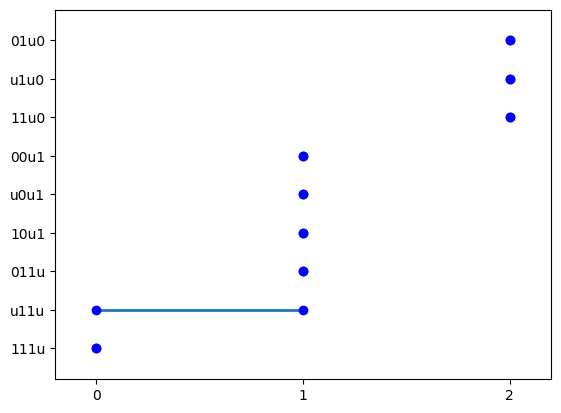

In [17]:
# Display 5 is used to specifically showcase a construction for a method different from RC, but with desirable properties
def display_5(closure_algorithm, input_mt):

    n, m, valuations_raw, valuations, ranks = closure_algorithm(input_mt, return_input = True)
    ranks_right = ranks.copy()
    lines = []

    rank_max = 0

    for idx in range(len(ranks)):
        rank_max = max(rank_max, ranks[idx])

    endpoints_1 = []
    endpoints_2 = []

    for idx in range(len(ranks)):
        lines.append([])
        if ranks[idx] != INF:
            lines[idx] = [(ranks[idx], idx), (ranks_right[idx] + ((valuations_raw[idx] == 'u11u')), idx)]
            endpoints_1.append((ranks[idx], idx))
            endpoints_2.append((ranks_right[idx] + ((valuations_raw[idx] == 'u11u')), idx))
        else:
            lines[idx] = [(0, idx), (0, idx)]

    lc = mc.LineCollection(lines, linewidths=2)
    fig, ax = pl.subplots()
    pl.yticks(range(len(ranks)), valuations_raw)
    pl.xticks(range(rank_max + 1))
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    ax.plot([x[0] for x in endpoints_1], [x[1] for x in endpoints_1], 'bo')
    ax.plot([x[0] for x in endpoints_2], [x[1] for x in endpoints_2], 'bo')
    # ax.plot(endpoints_2, 'ro')

display_5(rational_closure, construct_preset(["111u", "u11u", "011u", "10u1", "u0u1", "00u1", "11u0", "u1u0", "01u0"]))

Rank for valuation 1u1u is 0
Rank for valuation 1u01 is 1
Rank for valuation 011u is 1
Rank for valuation 0101 is 1
Rank for valuation 1u00 is 2
Rank for valuation 001u is 2
Rank for valuation 0100 is 2
Rank for valuation 0001 is 2
Rank for valuation 0000 is 2
Rank for valuation 1u1u is 0
Rank for valuation 1u01 is 1
Rank for valuation 011u is 1
Rank for valuation 0101 is 1
Rank for valuation 1u00 is 2
Rank for valuation 001u is 2
Rank for valuation 0100 is 2
Rank for valuation 0001 is 2
Rank for valuation 0000 is 2


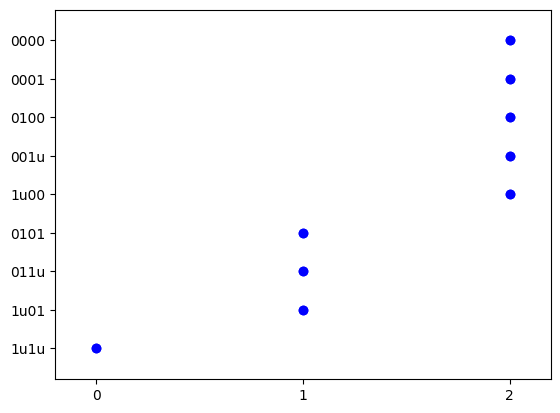

In [18]:
display(rational_closure, construct_preset(["1u1u", "1u01", "011u", "0101", "1u00", "001u", "0100", "0001", "0000"]))

Rank for valuation 1uu1uu is 0
Rank for valuation 01u1uu is 1
Rank for valuation 1uu01u is 1
Rank for valuation 01u01u is 1
Rank for valuation 0011uu is 2
Rank for valuation 1uu001 is 2
Rank for valuation 00101u is 2
Rank for valuation 01u001 is 2
Rank for valuation 001001 is 2
Rank for valuation 0001uu is 3
Rank for valuation 1uu000 is 3
Rank for valuation 00001u is 3
Rank for valuation 01u000 is 3
Rank for valuation 000001 is 3
Rank for valuation 001000 is 3
Rank for valuation 000000 is 3
Rank for valuation 1uu1uu is 0
Rank for valuation 01u1uu is 1
Rank for valuation 1uu01u is 1
Rank for valuation 01u01u is 1
Rank for valuation 0011uu is 2
Rank for valuation 1uu001 is 2
Rank for valuation 00101u is 2
Rank for valuation 01u001 is 2
Rank for valuation 001001 is 2
Rank for valuation 0001uu is 3
Rank for valuation 1uu000 is 3
Rank for valuation 00001u is 3
Rank for valuation 01u000 is 3
Rank for valuation 000001 is 3
Rank for valuation 001000 is 3
Rank for valuation 000000 is 3


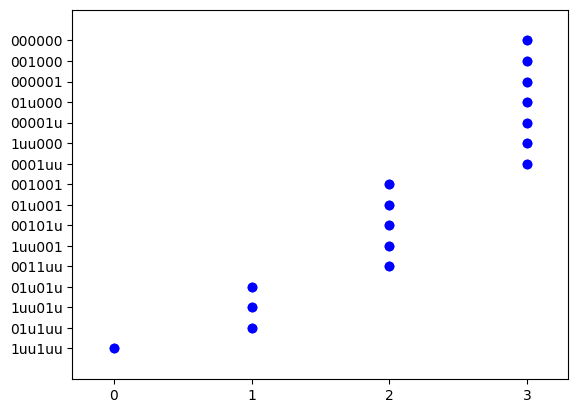

In [19]:
aa = ["1uu", "01u", "001", "000"]
bb = []

for index in range(len(aa)):
    for ij in range(index + 1):
        bb.append(aa[index] + aa[ij])
        if(ij != index):
            bb.append(aa[ij] + aa[index])
display(rational_closure, construct_preset(bb))

Rank for valuation 1uu is 0
Rank for valuation 01u is 1
Rank for valuation 001 is 2
Rank for valuation 000 is 3
Rank for valuation 1uu is 0
Rank for valuation 01u is 1
Rank for valuation 001 is 2
Rank for valuation 000 is 3


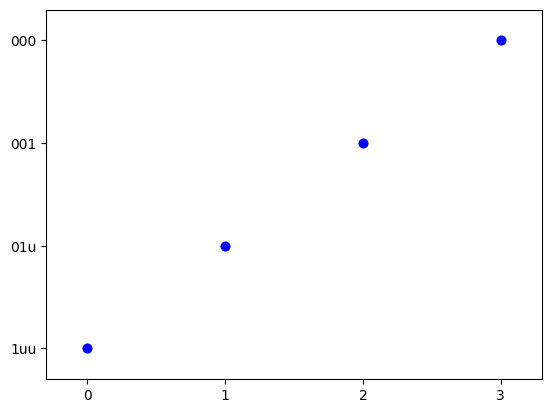

In [20]:
display(rational_closure, construct_preset(aa))

The following examples are used to show that Construction max-sum does not satisfy Cautious Monotonicity

KB = {p or q \vsim p}, cond = q \vsim p

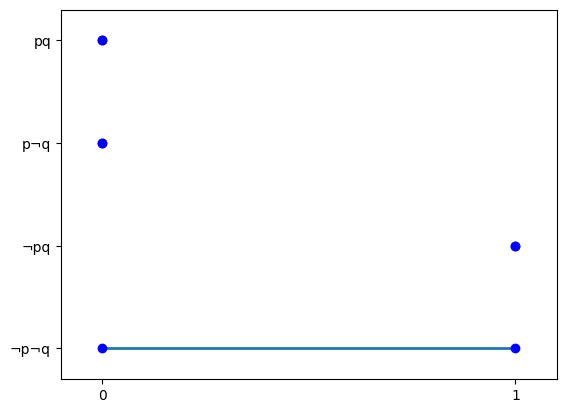

In [21]:
display_raw(["pq", "p¬q", "¬pq", "¬p¬q"], [(0, 0), (0, 0), (1, 1), (0, 1)])

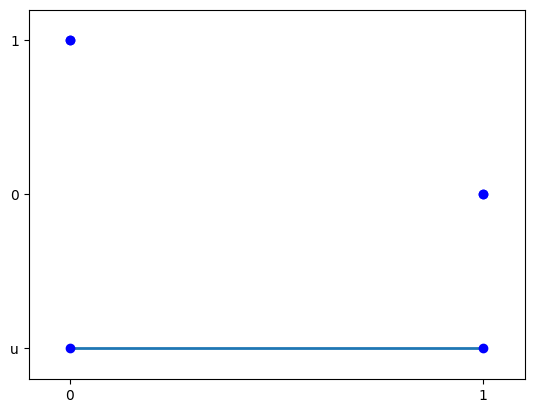

In [22]:
display_raw(["1", "0", "u"], [(0, 0), (1, 1), (0, 1)])

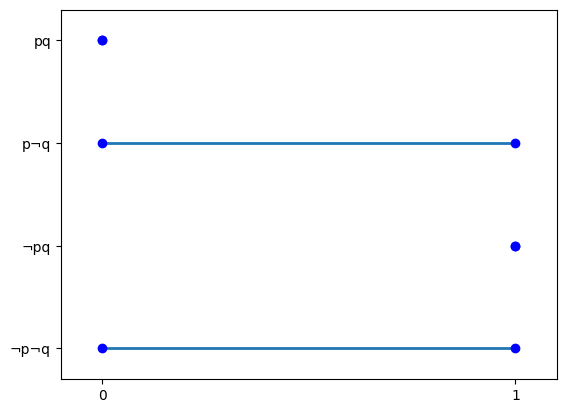

In [23]:
display_raw(["pq", "p¬q", "¬pq", "¬p¬q"], [(0, 0), (0, 1), (1, 1), (0, 1)])

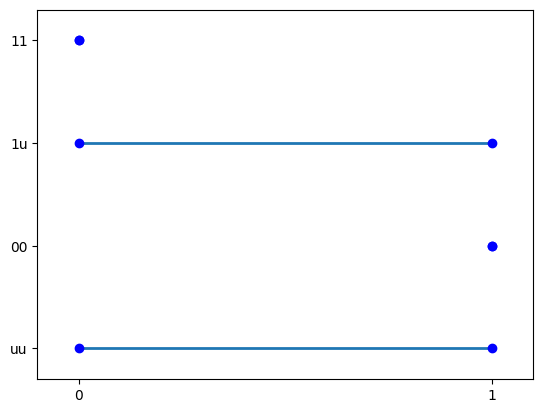

In [24]:
display_raw(["11", "1u", "00", "uu"], [(0, 0), (0, 1), (1, 1), (0, 1)])

Rank for valuation 11 is 0
Rank for valuation 1u is 0
Rank for valuation u1 is 0
Rank for valuation uu is 0
Rank for valuation 10 is 1
Rank for valuation 01 is 1
Rank for valuation u0 is 1
Rank for valuation 0u is 1
Rank for valuation 00 is 1


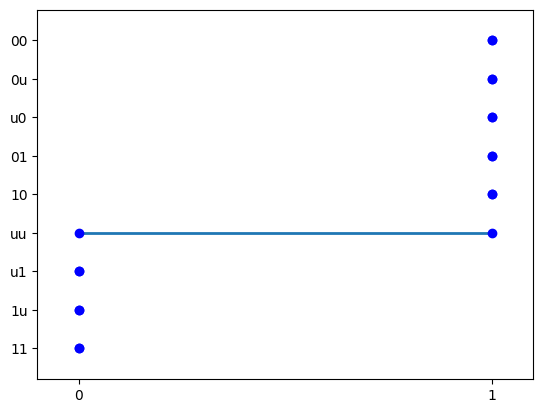

In [25]:
display(traditional_drc, construct_preset(["11", "1u", "u1", "uu", "10", "01", "u0", "0u", "00"]))

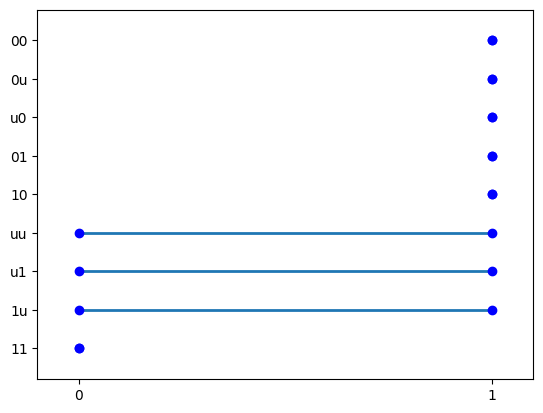

In [26]:
display_raw(["11", "1u", "u1", "uu", "10", "01", "u0", "0u", "00"], [(0, 0), (0, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], reverse = True)

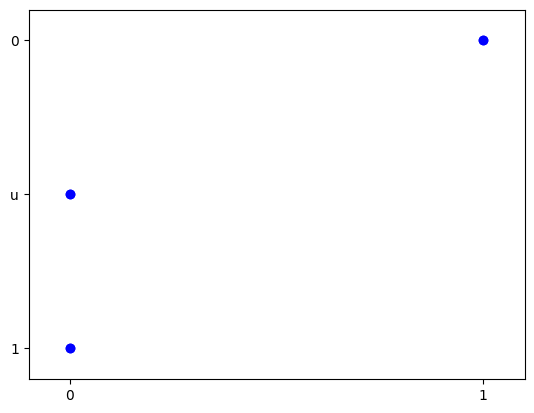

In [27]:
display_raw(["1", "u", "0"], [(0, 0), (0, 0), (1, 1)], reverse=True)

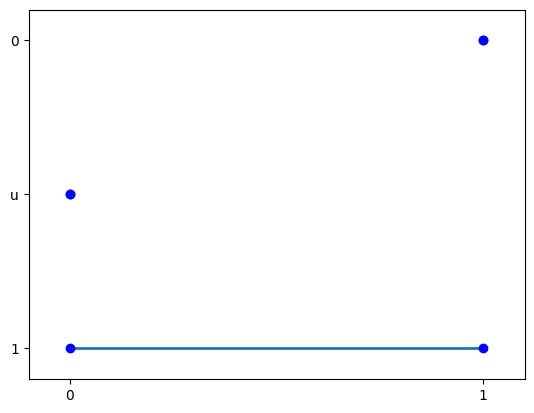

In [28]:
display_raw(["1", "u", "0"], [(0, 1), (0, 0), (1, 1)], reverse=True)

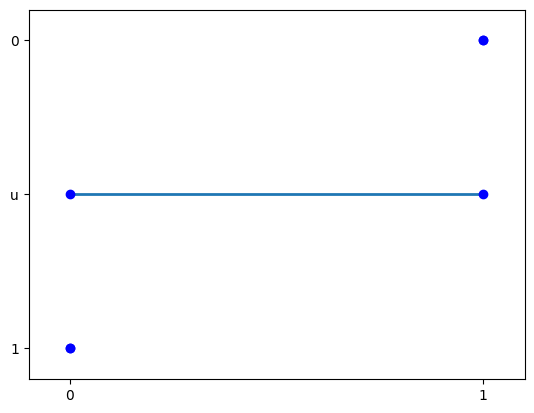

In [29]:
display_raw(["1", "u", "0"], [(0, 0), (0, 1), (1, 1)], reverse=True)

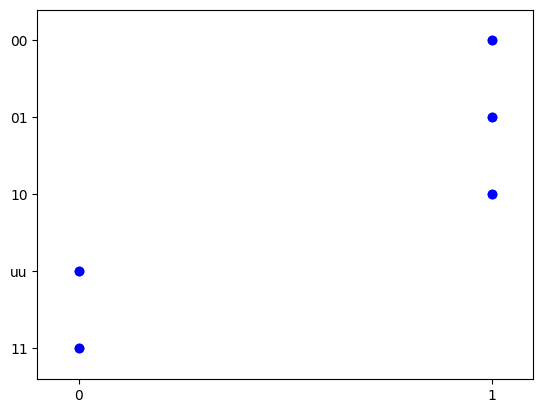

In [30]:
display_raw(["11", "uu", "10", "01", "00"], [(0,0), (0,0), (1,1), (1,1), (1,1)], reverse=True)

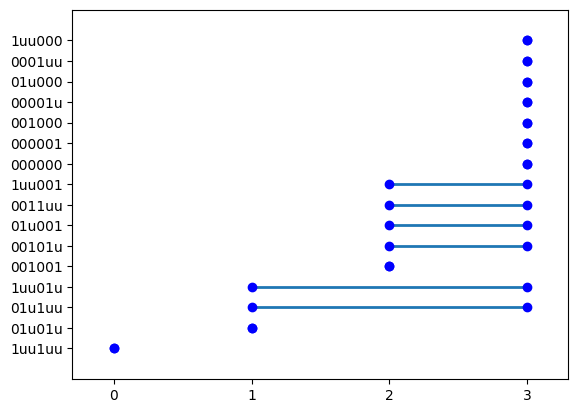

In [32]:
aa = ["1uu", "01u", "001", "000"]
bb = []
ranks = []
rnk = 0
max_rnk = 3

for index in range(len(aa)):
    for ij in reversed(range(index + 1)):
        bb.append(aa[index] + aa[ij])
        if(index == ij):
            ranks.append((rnk, rnk))
        if(ij != index):
            bb.append(aa[ij] + aa[index])
            ranks.append((rnk, max_rnk))
            ranks.append((rnk, max_rnk))
    rnk += 1
display_raw(bb, ranks, reverse=True)

Rank for valuation 1uu is 0
Rank for valuation 01u is 1
Rank for valuation 001 is 2
Rank for valuation uu0 is 3
Rank for valuation 1uu is 0
Rank for valuation 01u is 1
Rank for valuation 001 is 2
Rank for valuation uu0 is 3


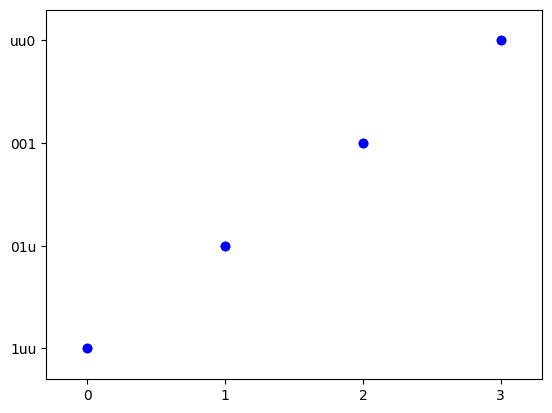

In [33]:
display(rational_closure, construct_preset(["1uu", "01u", "001", "uu0"]))

['1uu1u', '01u1u', '1uuuu', '01uuu', '0011u', '1uu01', '001uu', '01u01', '00101', '0001u', '1uu00', '000uu', '01u00', '00001', '00100', '00000']
Rank for valuation 1uu1u is 0
Rank for valuation 01u1u is 1
Rank for valuation 1uuuu is 0
Rank for valuation 01uuu is 1
Rank for valuation 0011u is 2
Rank for valuation 1uu01 is 1
Rank for valuation 001uu is 2
Rank for valuation 01u01 is 1
Rank for valuation 00101 is 2
Rank for valuation 0001u is 3
Rank for valuation 1uu00 is 2
Rank for valuation 000uu is 3
Rank for valuation 01u00 is 2
Rank for valuation 00001 is 3
Rank for valuation 00100 is 2
Rank for valuation 00000 is 3
Rank for valuation 1uu1u is 0
Rank for valuation 01u1u is 1
Rank for valuation 1uuuu is 0
Rank for valuation 01uuu is 1
Rank for valuation 0011u is 2
Rank for valuation 1uu01 is 1
Rank for valuation 001uu is 2
Rank for valuation 01u01 is 1
Rank for valuation 00101 is 2
Rank for valuation 0001u is 3
Rank for valuation 1uu00 is 2
Rank for valuation 000uu is 3
Rank for valuat

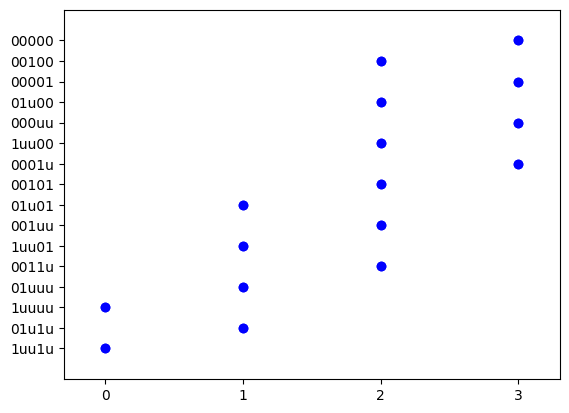

In [ ]:
aa1 = ["1uu", "01u", "001", "000"]
aa2 = ["1u", "uu", "01", "00"]
bb = []
limit = 1

for index in range(len(aa)):
    if(index == 0):
        limit += 1
    for ij in (range(limit)):
        bb.append(aa1[index] + aa2[ij])
        if(ij != index):
            bb.append(aa1[ij] + aa2[index])
    limit += 1

display(rational_closure, construct_preset(bb))

Rank for valuation 1u is 0
Rank for valuation uu is 0
Rank for valuation 01 is 1
Rank for valuation 00 is 2
Rank for valuation 1u is 0
Rank for valuation uu is 0
Rank for valuation 01 is 1
Rank for valuation 00 is 2


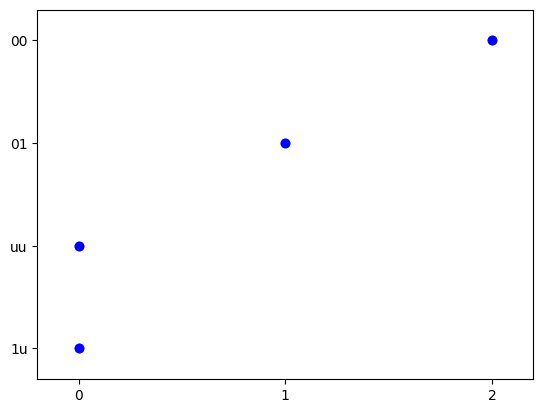